In [1]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
train_df.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [4]:
df=(np.array(train_df))
labels=df[:,-1]

names=np.unique(labels)

#print(labels)
print(labels.shape)
print(names)
    

(304,)
['Bulbasaur' 'Charmander' 'Pikachu']


In [5]:
test_df=pd.read_csv('test.csv')


In [6]:
print(test_df.head())
ids=np.array(test_df)
print(ids.shape)

    ImageId
0  1106.jpg
1  2236.jpg
2  1131.jpg
3  2221.jpg
4  2011.jpg
(123, 1)


In [7]:
p = Path("Images_Train")
image_data = []


for img_path in p.glob("*"):
    #print(img_path)
    img = image.load_img(img_path,target_size=(45,45))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    

c:\users\shubhika\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [8]:
# Convert this into numpy array
image_data = np.array(image_data)/255.0

print(image_data.shape,labels.shape)

(304, 45, 45, 3) (304,)


In [10]:
p1 = Path("Images_Test")
image_data_test= []

for i in range(ids.shape[0]):
    image_path=("Images_Test"+"/"+ids[i])
    img = image.load_img(image_path[0],target_size=(45,45))
    img_array = image.img_to_array(img)
    image_data_test.append(img_array)
    

In [11]:
# Convert this into numpy array
image_data_test = np.array(image_data_test)/255.0

print(image_data_test.shape)
print(image_data_test)

(123, 45, 45, 3)
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9098039  0.9254902  0.87058824]
   [0.9882353  0.9882353  0.98039216]
   [1.         1.         1.        ]]

  [[1.         1.         1.

## Shuffling the Training Data

In [12]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)
#Unzip
image_data[:],labels[:] = list(zip( * combined))

## Visualise the training data

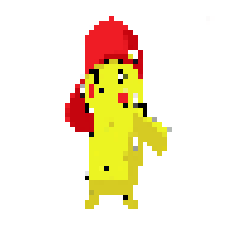

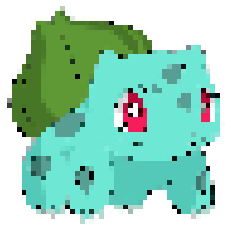

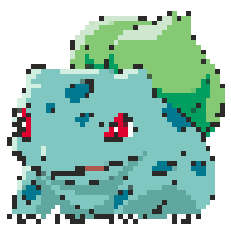

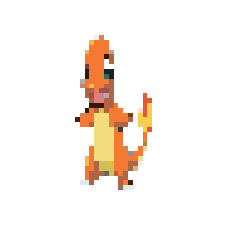

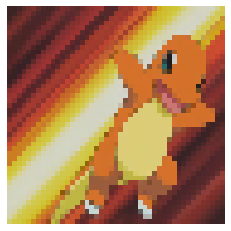

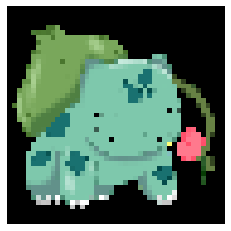

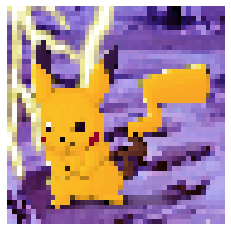

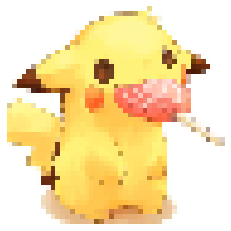

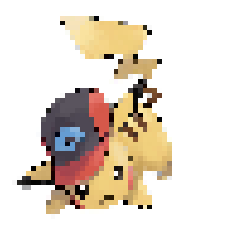

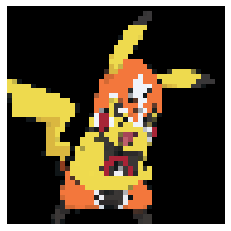

In [13]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

## Visualise the testing data

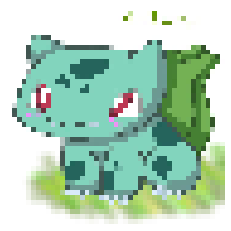

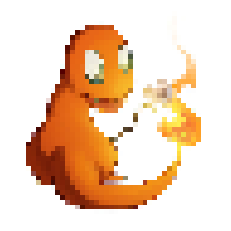

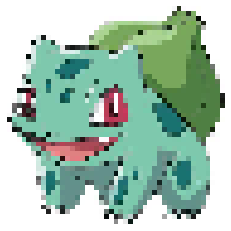

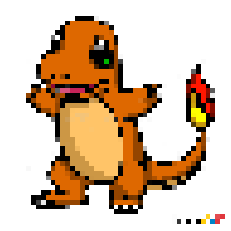

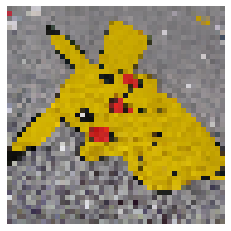

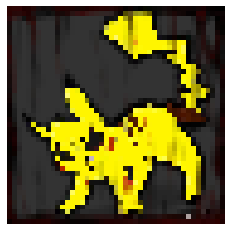

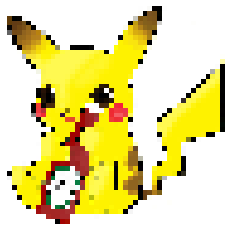

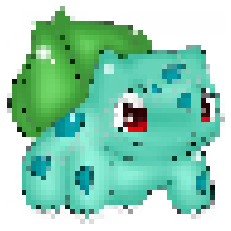

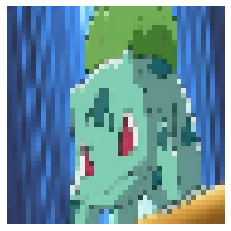

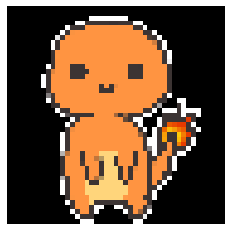

In [14]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data_test[i])

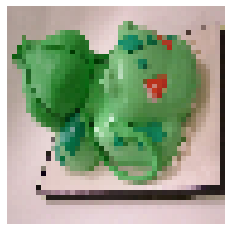

In [16]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

drawImg(image_data_test[100])

## Implementing SVM Classifier

In [17]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

## Converting Data for One VS One Classification!

In [18]:
# Testing Data

M = image_data_test.shape[0] 
image_data_test = image_data_test.reshape(M,-1)
print(image_data_test.shape)

(123, 6075)


In [19]:
# Training data

M1 = image_data.shape[0] 
image_data = image_data.reshape(M1,-1)
print(image_data.shape)
print(labels.shape)

(304, 6075)
(304,)


In [20]:
CLASSES = len(np.unique(labels))
print(CLASSES)

#labels_dict = {"Bulbasaur":0,"Charmander":1,"Pikachu":2}

for i in range(labels.shape[0]):
    if(labels[i]=="Bulbasaur"):
        labels[i]=0
    if(labels[i]=="Charmander"):
        labels[i]=1
    if(labels[i]=="Pikachu"):
        labels[i]=2
    


3


In [21]:
print(labels)
print(labels.shape)

[2 0 0 1 1 0 2 2 2 2 1 2 2 2 0 0 0 1 1 0 0 2 1 2 0 2 1 2 2 1 1 1 1 0 1 2 2
 0 2 2 2 1 1 0 1 0 0 2 2 1 1 1 0 2 0 1 2 1 2 1 2 2 2 2 2 1 2 2 0 2 0 0 1 1
 0 0 2 0 1 0 1 0 1 0 0 2 0 1 0 0 0 1 0 0 1 1 2 2 2 2 2 1 1 0 0 0 2 0 1 1 0
 0 2 1 2 2 2 2 0 1 2 1 0 2 0 1 2 2 1 1 1 0 0 2 0 2 1 2 0 0 1 0 2 1 0 2 2 1
 1 2 1 2 1 1 1 1 0 1 1 2 0 1 2 1 0 0 0 1 0 0 1 2 1 2 1 0 0 1 1 1 2 1 2 1 2
 2 1 2 2 2 1 0 1 0 2 0 2 1 2 1 0 1 1 0 2 1 0 2 0 2 0 0 1 0 0 2 1 0 0 1 2 0
 0 1 0 0 0 0 0 2 1 2 2 1 2 0 1 2 1 0 2 2 1 1 0 2 1 2 0 2 0 0 0 2 2 0 2 0 2
 0 1 1 2 2 2 1 2 0 2 2 0 1 2 1 0 1 0 1 1 1 0 1 2 0 0 2 2 0 1 2 1 0 0 0 0 1
 1 0 1 2 0 1 1 1]
(304,)


In [22]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [23]:
data = classWiseData(image_data,labels)

* Number of images of each class present in the dataset

In [24]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)

(101, 6075)
(102, 6075)
(101, 6075)


In [25]:
def getDataPairForSVM(d1,d2):
    """Combines Data of two classes into a single matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels
    

## Training  NC2 SVM's Part!

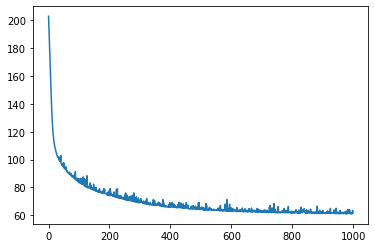

In [26]:
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

#Sample training part


In [27]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

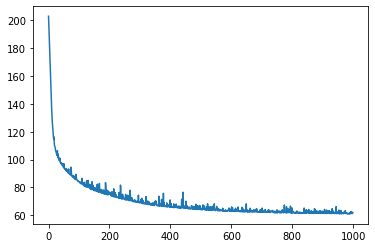

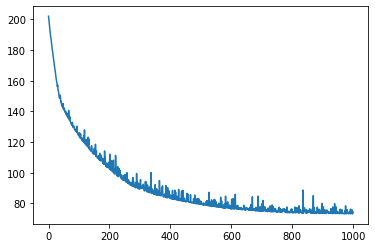

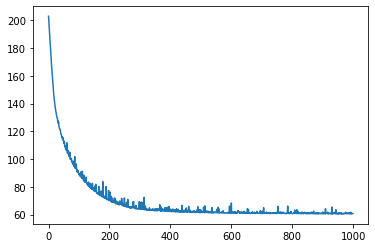

In [28]:
svm_classifiers = trainSVMs(image_data,labels)

In [29]:
#Parameters for diff classes
bulb_charm = svm_classifiers[0][1]
bulb_picka = svm_classifiers[0][2]
print(bulb_charm[0].shape)
print(bulb_picka[1])

(1, 6075)
-0.003540000000000002


## Prediction

In [30]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [31]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    
    name_prediction="None"
    
    if(final_prediction==0):
        name_prediction="Bulbasaur"
    
    
    if(final_prediction==1):
        name_prediction="Charmander"
        
    
    if(final_prediction==2):
        name_prediction="Pikachu"
    
    return final_prediction,name_prediction

In [32]:
print(predict(image_data[5]))  #Checking precition for 5th img


(2, 'Pikachu')


In [33]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction[0]==y[i]):
            count += 1
            
    return count/x.shape[0]


In [34]:
accuracy(image_data,labels)

0.7072368421052632

## Predicting Names instead of labels

In [35]:
pred=[]
for i in range(image_data_test.shape[0]):
    p_label,p_name=predict(image_data_test[i])
    pred.append(p_name)

In [36]:
pred=np.array(pred)
print(pred.shape)
print(image_data_test.shape)

(123,)
(123, 6075)


In [37]:
#print(pred)

## Storing Predictions in a File

In [38]:
print(test_df.head())


    ImageId
0  1106.jpg
1  2236.jpg
2  1131.jpg
3  2221.jpg
4  2011.jpg


In [39]:
ans_df=test_df

In [40]:
ans_df.insert(1, "NameofPokemon",pred, True) 

In [41]:
ans_df

,ImageId,NameofPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Charmander
...,...,...
118,1124.jpg,Bulbasaur
119,2014.jpg,Pikachu
120,2235.jpg,Charmander
121,1126.jpg,Bulbasaur


In [43]:
ans_df.to_csv('PokemonPredictions.csv',index=False)